## REI602M Machine Learning - Homework 7
### Due: *Monday* 4.3.2019

**Objectives**: Visualization with principal component analysis and t-SNE. $k$-means clustering

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:** (if any)

1\. [Visualization, 40 points] In this problem you will use PCA and t-SNE to visualize a high-dimensional data set derived from 300 Wikipedia articles selected from few broad groups of topics. For each Wikipedia article, the most common words such as 'an' and 'the' were removed and the rest of the words run through a stemming algorithm (converting e.g. 'longer' and 'longest' to 'long'). This resulted in a dictionary of all the words that occur in the 300 articles. The total number of words was 1000. A 1000-element histogram vector was then constructed for each article, where element $j$ is the frequency of word $j$ in the document, i.e. a 300 by 1000 matrix.

The Numpy file `wikipedia_corpus.npz` contains three arrays which you access as follows

```python
import numpy as np
data=np.load('wikipedia_corpus.npz')
dictionary = data["dictionary"]
article_titles = data["article_titles"]
article_histograms = data["article_histograms"] # Data matrix```

a) [20 points] Use PCA to create a 2D figure where each article in the figure is represent by a short string based on its title.

b) [10 points] Use the t-SNE code provided with the assignment to create a similar figure to the one in a). You may need to try a few different values of the perplexity parameter before you get a nice projection (include only the best one in your report). Can you "squeeze" more titles into this figure than the one in a)? What can you infer from your visualization?

c) [10 points] Use t-SNE to project the data to 3 dimensions. Use the first two dimensions as text coordinates but use the 3rd coordinate to color code the article title. Is this figure more informative than the one in b) in your opinion?

*Comments*:

1) Creating informative figures usually takes some effort so expect to spend some time tinkering with your figure. See http://www.cs.toronto.edu/~hinton/turian.png for an example of how your figure could look like.

2) You should try to use as large figure as possible, use `plt.figure(figsize=(xsize,ysize))`

3) You can only display titles of 100 - 150 articles in the figure, otherwise you are likely to end up with a black mess.

4) Some of the titles are quite long and you should therefore truncate them somehow, e.g. by keeping only the two first words in the title. Useful Python's string `split` and `join` methods may come in handy. Use `plt.text` to display text in the figure.

5) For the color figure in c) see e.g. https://lvdmaaten.github.io/tsne/examples/semantic_tsne.jpg

6) A simple way to convert coordinate values into a color value is to map them into an integer betwen 0 and 9 and use the `color=Cx` keyword argument in `plt.text` (x represents an integer between 0 and 9).

7) Use PCA from scikit and the t-SNE code provided with this assignment (taken from https://lvdmaaten.github.io/tsne/)

**(a)**

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data=np.load('wikipedia_corpus.npz')
dictionary = data["dictionary"]
article_titles = data["article_titles"]
article_histograms = data["article_histograms"] # Data matrix
n,p =article_histograms.shape
at_red = np.copy(article_titles)
for i in range(n):
    at_red[i] = ' '.join(at_red[i].split()[:2])

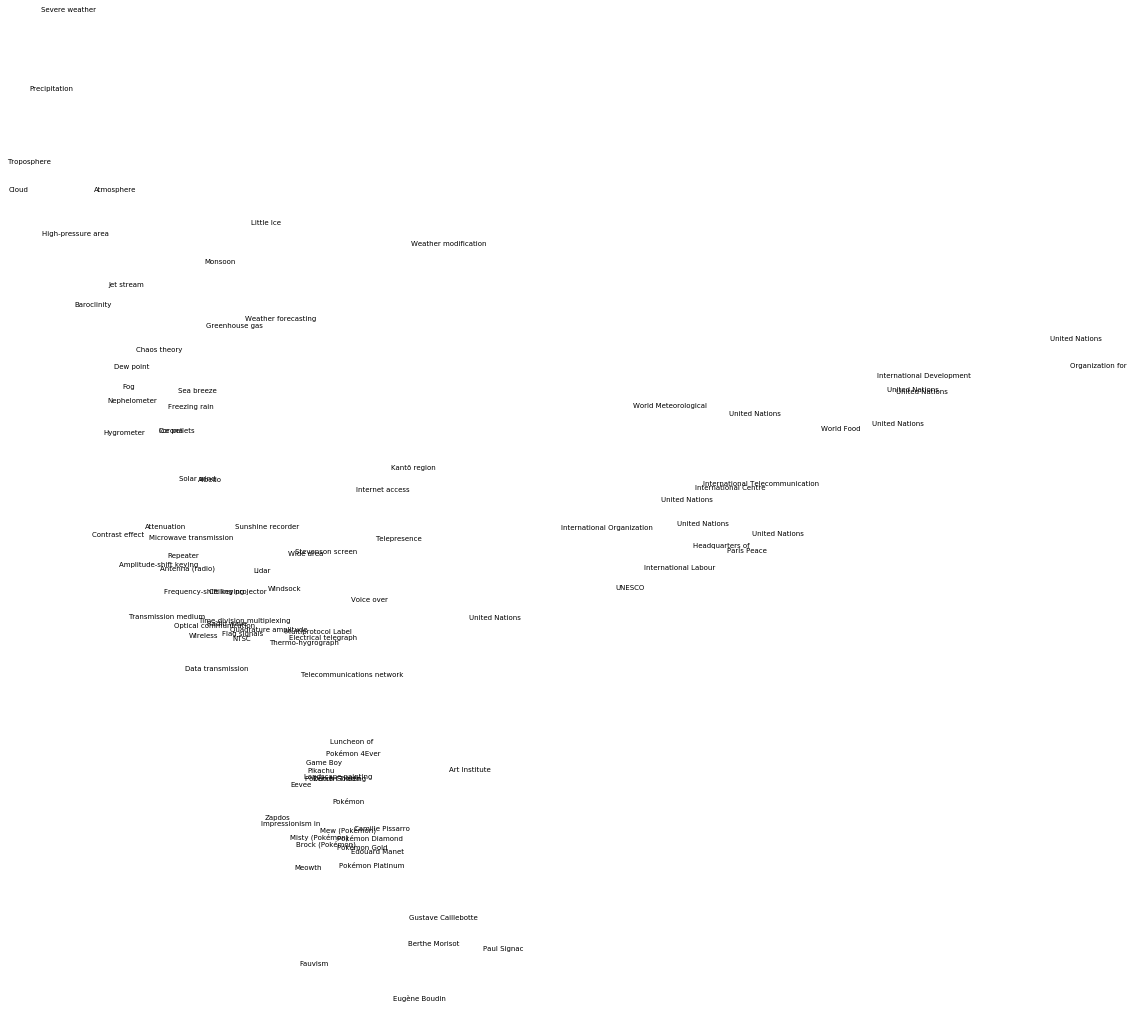

In [47]:
X = StandardScaler().fit_transform(article_histograms)
pca = PCA(n_components=2)
pca.fit(X)
Xred = pca.transform(X)
teljari=0
plt.figure(figsize=(0.7,0.7))
for i in range(n):
    teljari = teljari+1
    if teljari%3==0:
        plt.text(Xred[i,0],Xred[i,1],at_red[i],fontsize=7)
plt.axis('off')
plt.show()

**(b)**

In [13]:
from tsne import tsne

yfit = tsne(article_histograms,no_dims=2, perplexity=10)#25 er fínt og 27 og 17

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 0.295494
Iteration 100: error is 13.263823
Iteration 200: error is 0.469110
Iteration 300: error is 0.432354
Iteration 400: error is 0.423778
Iteration 500: error is 0.419891
Iteration 600: error is 0.417584
Iteration 700: error is 0.416007
Iteration 800: error is 0.414849
Iteration 900: error is 0.413919
Iteration 1000: error is 0.413168


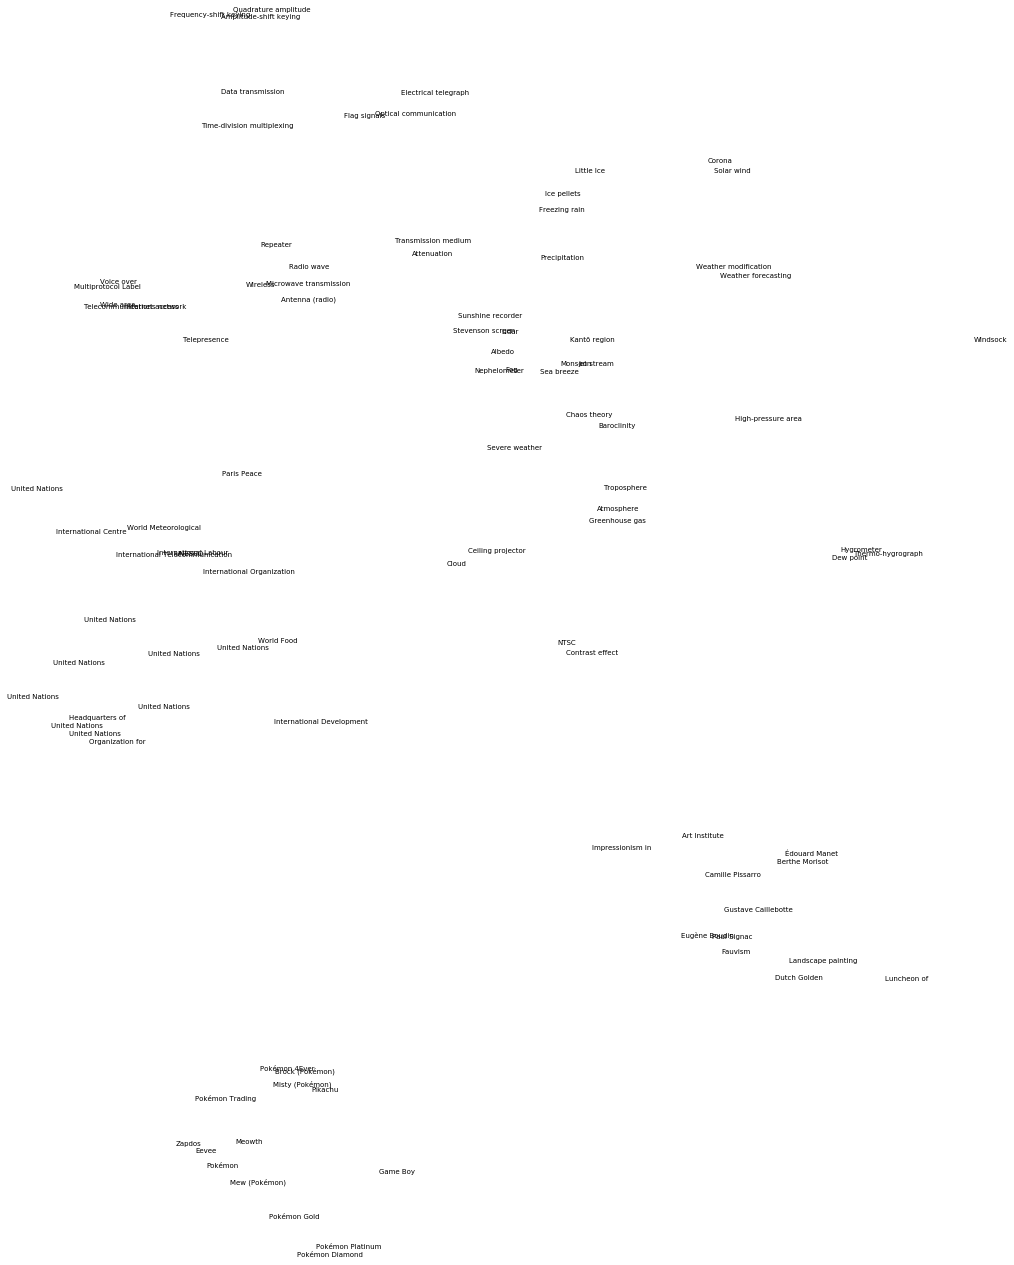

In [14]:
plt.figure(figsize=(0.2,0.2))
for i in range(n):
    teljari = teljari+1
    if teljari%3==0:
        plt.text(yfit[i,0],yfit[i,1],at_red[i],fontsize=7)
plt.axis('off')
plt.show()

Þessi mynd er frábrugðin fyrri myndinni á þann hátt að hún myndar greinilegri klasa(e. clusters) þar sem innan hverrs klasa eru greinar sem eru svipaðar. Við fáum t.d. einn klasa af pókemon greinum og annan klasa af pólitík. 

In [11]:
#Use t-SNE to project the data to 3 dimensions. Use the first two 
#dimensions as text coordinates but use the 3rd coordinate to color code the article title. 
#Is this figure more informative than the one in b) in your opinion?
yfit3 = tsne(article_histograms,no_dims=3, perplexity=10)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 300...
Mean value of sigma: 0.295494
Iteration 100: error is 12.653724
Iteration 200: error is 0.422997
Iteration 300: error is 0.392295
Iteration 400: error is 0.384237
Iteration 500: error is 0.379745
Iteration 600: error is 0.377035
Iteration 700: error is 0.375087
Iteration 800: error is 0.373569
Iteration 900: error is 0.372354
Iteration 1000: error is 0.371366


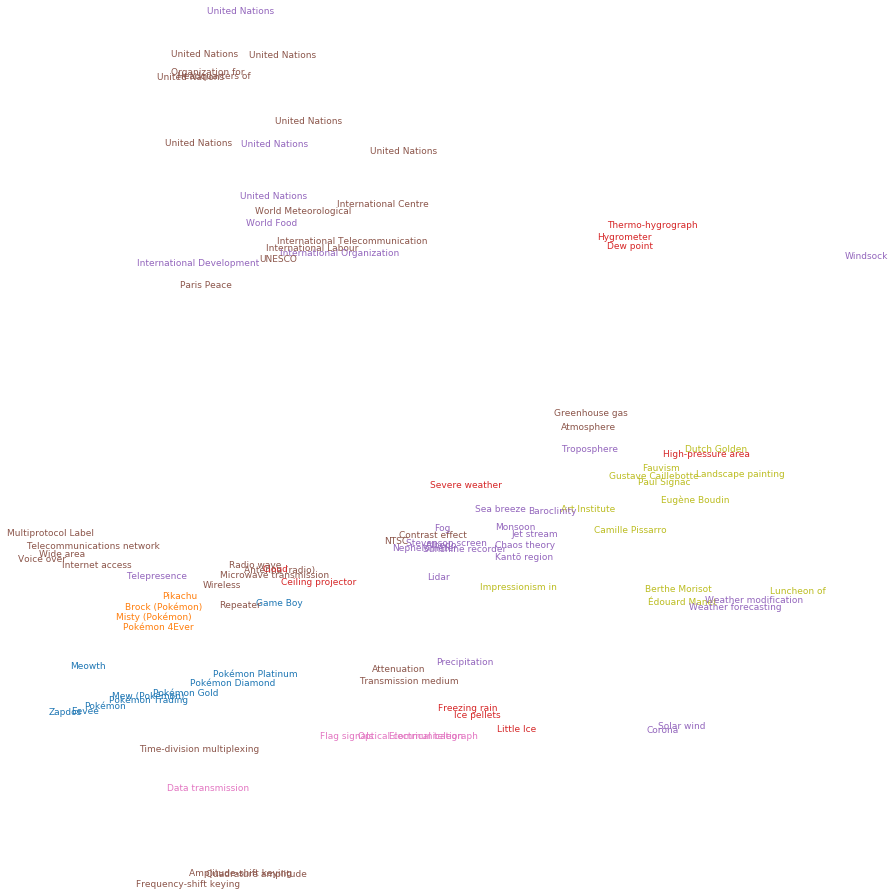

In [44]:
t3 = yfit3[:,2]
colors = (9*((t3-t3.min())/(t3.max() - t3.min()))).astype(int)
colstr = ['C' + str(n) for n in colors]

plt.figure(figsize=(0.2,0.2))
for i in range(n):
    teljari = teljari+1
    if teljari%3==0:
        plt.text(yfit3[i,0],yfit3[i,1],at_red[i],color=colstr[i],fontsize=9)
plt.axis('off')
plt.show()

Hér fáum við þriðju víddina sem lit á kortinu og það gefur okkur töluvert meiri upplýsingar hvernig tölvan vill flokka greinarnar. Vandamálið er þó að litirnir eru svolítið binary og gefa ekki góða mynd af því hvaða litir eru 'nær' hver öðrum.

2\. [Topic discovery via $k$-means, 30 points] Here you are to use the $k$-means algorithm to cluster the data from problem 1.

Run $k$-means with different values of $k$, e.g. $k=2,5,8$ and investigate your results by looking at the words and article titles associated with each centroid. Feel free to visit Wikipedia if an article’s content is unclear from its title. On the basis of your tests, select a final value of $k$ and run $k$-means again. Give a short description of the topics your clustering discovered along with the 5 most common words from each topic. If the topics do not make sense pick another value of $k$.

*Comments*:

1) When you run the $k$-means implementation in `sklearn.cluster.KMeans` it initializes the centroids by randomly assigning the data points to $k$ groups and taking the $k$ representatives as the means of the groups. (This means that if you run the function twice, with the same data, you might get diﬀerent results.) The cluster centers and labels can be accessed via the attributes `cluster_centers_` and `labels_`. The attribute `labels_` contains the index of each vector’s closest centroid (labels start from zero), so if the 30th entry in `labels` is 7, then the 30th vector’s closest centroid is the 7th entry in `centroids` (indexing starts from zero).

2) There are many ways to explore your results. For example, you could print the titles of all articles in a cluster. Alternatively, you could ﬁnd a topic’s most common words by ordering `dictionary` by the size of its centroid’s entries. A larger entry for a word implies it was more common in articles from that topic.

In [93]:
from sklearn.cluster import KMeans

kk = [2,5,8]
for k in kk:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    mid = kmean.cluster_centers_
    lab = kmean.labels_    
    print('-'*40)
    print('Fjöldi klasa:',k)
    print('-'*40)
    for i in range(k):
        maxToMin = np.argsort(mid[i])[::-1]
        words = dictionary[maxToMin[0:5]]#algengust orð
        fjoldi = np.sum(lab==i)#fjöldi í cluster
        greinar = article_titles[lab==i]#greinar í cluster
        print('Klasi nr:', i)
        print('fjöldi staka:', fjoldi)
        print('Algengustu orð:',words)
        print('Greinar innan klasans:', greinar[np.random.randint(0,len(greinar),5)])
        print('\n')
        
        
    

----------------------------------------
Fjöldi klasa: 2
----------------------------------------
Klasi nr: 0
fjöldi staka: 63
Algengustu orð: ['international' 'nations' 'member' 'organization' 'policy']
Greinar innan klasans: ['Convention on the Rights of Persons with Disabilities'
 'Organization for Security and Co-operation in Europe'
 'United Nations General Assembly' 'United Nations Trusteeship Council'
 'League of Nations']


Klasi nr: 1
fjöldi staka: 237
Algengustu orð: ['form' 'typically' 'lower' 'surface' 'relatively']
Greinar innan klasans: ['Hurricane Katrina' 'Solarimeter' 'Mew (Pokémon)'
 'A Sunday Afternoon on the Island of La Grande Jatte'
 'Telecommunications network']


----------------------------------------
Fjöldi klasa: 5
----------------------------------------
Klasi nr: 0
fjöldi staka: 55
Algengustu orð: ['surface' 'weather' 'winds' 'moisture' 'atmospheric']
Greinar innan klasans: ['Greenhouse gas' 'Little Ice Age' 'Radiosonde' 'Coriolis effect'
 'Meteorology']



Við viljum helst ekki mynda klasa sem hafa fá stök. Við sjáum að þegar $k=8$ fáum við þrjá klasa sem hafa færri en 5 stök, það bendir til þess að við séum að of-flokka. þegar $k=2$ fáum við annan klasann töluvert stærri en hinn þar sem sá minni inniheldur að mestu greinar um pólitík. Ég dreg þá ályktun að þegar $k=5$ þá höfum við bestu skiptinguna því þar eru klasarnir að mestu jafn stórir og orðin og greinarnar stemma saman.

Það lítur út fyrir að vera að flokkarnir fimm séu: pokémon, frönsk list, pólitík/alþjóðalög, veður og rafmagnsverkfræði/samskiptatækni.

In [107]:
k = 5
kmean = KMeans(n_clusters = k)
kmean.fit(X)
mid = kmean.cluster_centers_
lab = kmean.labels_    
print('-'*40)
print('Fjöldi klasa:',k)
print('-'*40)
for i in range(k):
    maxToMin = np.argsort(mid[i])[::-1]
    words = dictionary[maxToMin[0:5]]#algengust orð
    fjoldi = np.sum(lab==i)#fjöldi í cluster
    greinar = article_titles[lab==i]#greinar í cluster
    print('Klasi nr:', i)
    print('fjöldi staka:', fjoldi)
    print('Algengustu orð:',words)
    print('Greinar innan klasans:', greinar[np.random.randint(0,len(greinar),5)])
    print('\n')

----------------------------------------
Fjöldi klasa: 5
----------------------------------------
Klasi nr: 0
fjöldi staka: 55
Algengustu orð: ['signal' 'communications' 'transmitted' 'transmit' 'communication']
Greinar innan klasans: ['Wireless' 'Amplitude modulation' 'Wide area network' 'Wide area network'
 'Guglielmo Marconi']


Klasi nr: 1
fjöldi staka: 97
Algengustu orð: ['surface' 'water' 'air' 'weather' 'winds']
Greinar innan klasans: ['Numerical weather prediction' 'Albedo' 'Mesoscale meteorology'
 'Weather balloon' 'Monsoon']


Klasi nr: 2
fjöldi staka: 45
Algengustu orð: ['art' 'painting' 'paintings' 'painted' 'impressionist']
Greinar innan klasans: ['Impressionism' 'Georges Seurat' 'Paris Street; Rainy Day'
 'Bal du moulin de la Galette' 'Paris Street; Rainy Day']


Klasi nr: 3
fjöldi staka: 66
Algengustu orð: ['international' 'nations' 'organization' 'member' 'general']
Greinar innan klasans: ['Organisation for the Prohibition of Chemical Weapons'
 'United Nations Conventio

Hér fyrir ofan hef ég keyrt $k=5$ aftur og fæ svipaðar niðurstöður og á undan.

3\. [Image compresssion with $k$-means, 30 points] In this problem which is from Andrew Ng at Stanford, you 
will apply the $k$-means algorithm to lossy image compression, by reducing the number of colors used in an image.
You will be using the files `mandrill-small.tiff` and `mandrill-large.tiff`.

The `mandrill-large.tiff` file contains a 512x512 image of a mandrill represented in 24-
bit color. This means that, for each of the 262144 pixels in the image, there are three 8-bit
numbers (each ranging from 0 to 255) that represent the red, green, and blue intensity
values for that pixel. The straightforward representation of this image therefore takes
about 262144×3 = 786432 bytes (a byte being 8 bits). To compress the image, we will use
$k$-means to reduce the image to $k = 16$ colors. More specifically, each pixel in the image is
considered a point in the three-dimensional $(r, g, b)$-space. To compress the image, we will
cluster these points in color-space into 16 clusters, and replace each pixel with the closest
cluster centroid.

Follow the instructions below.

To load the image, type
```python
   from matplotlib.image import imread.
   import matplotlib.pyplot as plt
   A = imread('mandrill-large.tiff')```

Now, `A` is a "three dimensional" matrix, and `A[:,:,0]`, `A[:,:,1]` and `A[:,:,2]` are $512 \times 512$ arrays
that respectively contain the red, green and blue values for each pixel. To display the image, enter
```python
   plt.imshow(A);
   plt.show() to display the image```

Note: The `imshow` function expects the red, green and blue values to be between 0 and 1. You should start by scaling all  $(R,G,B)$ values by dividing by 255, otherwise you may end up with incorrect color scheme in the reconstructed image below.

Since the large image has 262144 pixels and would take a while to cluster, we will instead
run vector quantization on a smaller image. Repeat the above with `mandrill-small.tiff`.
Treating each pixel’s $(r, g, b)$ values as an element of $R^3$. Run $k$-means with 16 clusters
on the pixel data from this smaller image.

Take the matrix `A` from `mandrill-large.tiff`, and replace each pixel’s $(r, g, b)$ values
with the value of the closest cluster centroid. Display the new image, and compare it
visually to the original image.

If we represent the image with these reduced (16) colors, by (approximately) what
factor have we compressed the image?

*Comment*: Use the $k$-means implementation in `sklearn.cluster.KMeans`.

In [185]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
A = imread('mandrill-large.tiff')
B = imread('mandrill-small.tiff')
n = A.shape[0]
p = A.shape[1]
A_rgb = A.reshape(A.shape[0]*A.shape[1],3) #rgb transform

    

A_km = KMeans(n_clusters=16)
A_km.fit(A_rgb)

clusters = A_km.cluster_centers_ #Litir í rgb
labels = A_km.labels_  #vigur
labels = labels.reshape(n,p); #512*512 fylki með labels




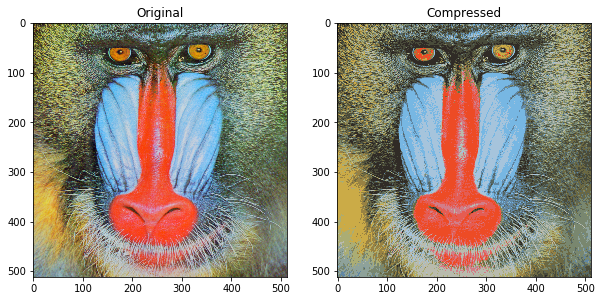

In [190]:
A_compressed = np.zeros((n,p,3))
for i in range(n):
    for j in range(p):
        A_compressed[i,j,:] = clusters[labels[i,j],:].astype(int)/255
        
# plottum
A = A/255
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(A_compressed)
plt.title('Compressed')
plt.show()

Upprunalega myndin samanstendur úr $N_{lossless} = 512\cdot 512\cdot 256\cdot 3 = 201326592$ mögulegum uppröðunum. Sú seinni inniheldur aðeins $N_{compressed} = 512\cdot 512\cdot 16 \cdot 3= 12582912$ mögulegar uppraðanir. þetta gefur okkur hlutfallið: $\frac{N_{compressed}}{N_{lossless}} = 0.0625 = \frac{1}{16}$. 